# Quiz 3

MINE-4101: Applied Data Science  
Univerisdad de los Andes  

COLUMNS
* age: age of primary beneficiary
* sex: insurance contractor gender, female, male
* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
* objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking
* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
* charges: Individual medical costs billed by health insurance

In [128]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MaxAbsScaler

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

%matplotlib inline

In [129]:
insurance_df = pd.read_csv('./Data/insurance.csv', sep = ',')

In [130]:
insurance_df.shape

(1338, 7)

In [131]:
insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [132]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Perfilamiento de datos


In [133]:
profile = ProfileReport(insurance_df)

In [11]:
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]


### Limpieza y procesamiento

In [134]:
insurance_df.drop_duplicates(inplace=True)

In [135]:
labelencoder = LabelEncoder()
insurance_df['sex_encoded'] = labelencoder.fit_transform(insurance_df['sex'])
insurance_df['smoker_encoded'] = labelencoder.fit_transform(insurance_df['smoker'])
insurance_df

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [136]:
insurance_df.drop(columns=['sex', 'smoker'], inplace=True)
insurance_df

,age,bmi,children,region,charges,sex_encoded,smoker_encoded
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,1,0
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [137]:
insurance_df = pd.get_dummies(insurance_df)
insurance_df

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


### Separación de datos

Separando la variable objetivo

In [138]:
X = insurance_df.drop("charges", axis=1)
y = insurance_df["charges"]

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [140]:
print("X Train: ", X_train.shape)
print("X Test: ", X_test.shape)
print("Y Train: ", Y_train.shape)
print("Y Train: ", Y_test.shape)

X Train:  (1069, 9)
X Test:  (268, 9)
Y Train:  (1069,)
Y Train:  (268,)


In [141]:
abs_scaler = MaxAbsScaler()

abs_scaler.fit(X_train)
X_train_scaled = abs_scaler.transform(X_train)
X_test_scaled = abs_scaler.transform(X_test)

In [142]:
X_train_scaled_maxAbs = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_maxAbs = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_scaled_maxAbs

,age,bmi,children,sex_encoded,smoker_encoded,region_northeast,region_northwest,region_southeast,region_southwest
0,0.937500,0.623188,0.6,1.0,0.0,0.0,0.0,1.0,0.0
1,0.937500,0.452381,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.750000,0.514963,0.2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.296875,0.656879,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.296875,0.543572,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1064,0.765625,0.425560,0.2,0.0,0.0,0.0,1.0,0.0,0.0
1065,0.421875,0.613307,0.6,1.0,0.0,1.0,0.0,0.0,0.0
1066,0.343750,0.635611,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1067,0.625000,0.418219,0.4,0.0,1.0,0.0,0.0,1.0,0.0


### Punto 1
Entrene un primer modelo de regresión lineal sin aplicar ningún tipo de regularización. Evalúe dicho modelo y concluya

In [143]:
regr = LinearRegression()
regr.fit(X_train_scaled_maxAbs, Y_train)

LinearRegression()

In [144]:
regr.coef_

array([16377.8284133 , 20558.90845725,  2899.6805432 ,  -522.00393959,
       23591.24393039,   676.0356847 ,   207.94627325,  -681.32491881,
        -202.65703914])

In [145]:
regr.intercept_

-13801.032234160784

Evaluando el modelo

In [146]:
preds_train = regr.predict(X_train_scaled_maxAbs)
preds_test = regr.predict(X_test_scaled_maxAbs)

In [147]:
print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, preds_train))
print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, preds_test))

Mean Absolute Error: Train  4362.800361128359
Mean Absolute Error: Test  3924.636038021782


In [148]:
print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, preds_train)))
print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, preds_test)))

Root Mean Squared Error: Train  6145.32833487281
Root Mean Squared Error: Test 5689.308291189106


In [149]:
print('R2 score: Train', r2_score(Y_train, preds_train))
print('R2 score: Test', r2_score(Y_test, preds_test))

R2 score: Train 0.7486381659434201
R2 score: Test 0.74978143885407


Conclusiones:

¿Es aceptable el error obtenido?
EL error no es tan pequeño, y dependiendo del negocio podría decirce que puede ser aceptable. Por otra lado, es posible construir un modelo con un mejor desempeño para obtener un error menor. 
Con la ayuda del puntaje R2 nos damos cuenta que el modelo no está sobre-ajustado y que tienen un "buen" desempeño en general.

¿Hay evidencia de overfitting?
Los errores de entrenamiento y pruebas son muy similares, por lo que se concluye que no hay sobre-ajuste. Habría sobre-ajuste si el error de entrenamiento es mucho mayor al error de prueba, ya que significaría que el modelo se aprendió los datos de entrenamiento, por lo que su desempeño con un nuevo dato es malo.

### Punto 2
Aplique una transformación polinomial a los datos de entrada y regularización Ridge o Lasso al modelo de
regresión. Pruebe con al menos 2 grados diferentes del polinomio y con al menos 3 valores de alpha para la
regularización.

### Transformación polinomial y Aplicando Regresión Ridge

Polinomio de grado 3

In [154]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

In [155]:
RidgeModel = Ridge(alpha = 5, random_state=20)
RidgeModel.fit(X_poly_train, Y_train)

Ridge(alpha=5, random_state=20)

In [156]:
y_pred_train = RidgeModel.predict(X_poly_train)
y_pred_test = RidgeModel.predict(X_poly_test)

In [157]:
print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, y_pred_train))
print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, y_pred_test))
print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print('R2 score: Train', r2_score(Y_train, y_pred_train))
print('R2 score: Test', r2_score(Y_test, y_pred_test))

Mean Absolute Error: Train  2900.3813962630893
Mean Absolute Error: Test  2943.5064409583706
Root Mean Squared Error: Train  4598.397086077175
Root Mean Squared Error: Test 4906.141897577233
R2 score: Train 0.8592585257004169
R2 score: Test 0.8139280982070702


In [159]:
# Lists definition
results = []
alphaValues = []
r2ScoreResult_training = []
r2ScoreResult_test = []
rmseResult_training = []
rmseResult_test = []
maeResult_training = []
maeResult_test = []

# Iterating all values and calculating the error for each alpha value

alphas = [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

for i in alphas:
  
  # Adding the alpha value to the list
  alphaValues.append(i);
  
  # Calculating model with the alpha value "i"
  RidgeModel = Ridge(alpha = i, random_state=20)
  RidgeModel.fit(X_poly_train, Y_train)

  # Prediction for training values
  y_pred_train = RidgeModel.predict(X_poly_train)
  # Calculating R2 score
  r2ScoreResult_training.append(r2_score(Y_train, y_pred_train))
  # Calculating the mean squared error
  rmseResult_training.append(np.sqrt(mean_squared_error(Y_train, y_pred_train)))
  # Calculating the median absolute error
  maeResult_training.append(mean_absolute_error(Y_train, y_pred_train))

  # FOR TEST VALUES
  # Prediction for test values
  y_pred_test = RidgeModel.predict(X_poly_test)
  # Calculating R2 score
  r2ScoreResult_test.append(r2_score(Y_test, y_pred_test))
  # Calculating the mean squared error
  rmseResult_test.append(np.sqrt(mean_squared_error(Y_test, y_pred_test)))
  # Calculating the median absolute error
  maeResult_test.append(mean_absolute_error(Y_test, y_pred_test))

  # print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, y_pred_train))
  # print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, y_pred_test))
  # print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
  # print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))
  # print('R2 score: Train', r2_score(Y_train, y_pred_train))
  # print('R2 score: Test', r2_score(Y_test, y_pred_test))

c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.7339e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=5.73407e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


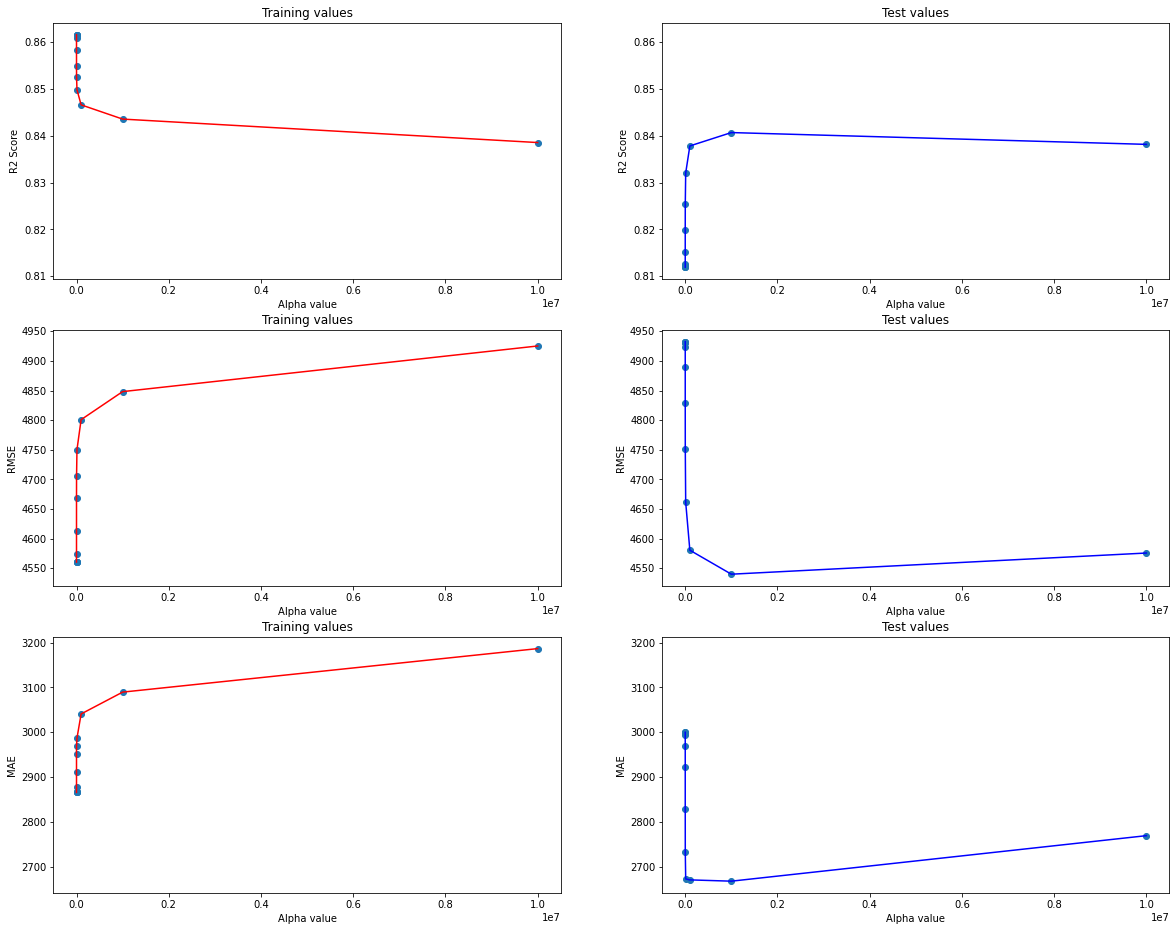

In [163]:
f = plt.figure(figsize=(20,16))

ax1 = f.add_subplot(321)
plt.scatter(alphas, np.array(r2ScoreResult_training))
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.plot(alphas, np.array(r2ScoreResult_training), color = 'red')
plt.title('Training values')

ax2 = f.add_subplot(322, sharey = ax1)
plt.scatter(alphas, r2ScoreResult_test)
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.plot(alphas, r2ScoreResult_test, color = 'blue')
plt.title('Test values')

ax3 = f.add_subplot(323)
plt.scatter(alphas, np.array(rmseResult_training))
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, np.array(rmseResult_training), color = 'red')
plt.title('Training values')

ax4 = f.add_subplot(324, sharey = ax3)
plt.scatter(alphas, rmseResult_test)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, rmseResult_test, color = 'blue')
plt.title('Test values')

ax5 = f.add_subplot(325)
plt.scatter(alphas, np.array(maeResult_training))
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, np.array(maeResult_training), color = 'red')
plt.title('Training values')

ax6 = f.add_subplot(326, sharey = ax5)
plt.scatter(alphas, maeResult_test)
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, maeResult_test, color = 'blue')
plt.title('Test values')

plt.show()

Polinomio de grado 5

In [169]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

In [170]:
RidgeModel = Ridge(alpha = 5, random_state=20)
RidgeModel.fit(X_poly_train, Y_train)

c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge(alpha=5, random_state=20)

In [171]:
y_pred_train = RidgeModel.predict(X_poly_train)
y_pred_test = RidgeModel.predict(X_poly_test)

In [172]:
print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, y_pred_train))
print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, y_pred_test))
print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))
print('R2 score: Train', r2_score(Y_train, y_pred_train))
print('R2 score: Test', r2_score(Y_test, y_pred_test))

Mean Absolute Error: Train  2651.7371302495735
Mean Absolute Error: Test  3848.4807121425306
Root Mean Squared Error: Train  4179.863056693373
Root Mean Squared Error: Test 6479.183205587922
R2 score: Train 0.8837124393936922
R2 score: Test 0.675480269129811


In [173]:
# Lists definition
results = []
alphaValues = []
r2ScoreResult_training = []
r2ScoreResult_test = []
rmseResult_training = []
rmseResult_test = []
maeResult_training = []
maeResult_test = []

# Iterating all values and calculating the error for each alpha value

alphas = [ 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

for i in alphas:
  
  # Adding the alpha value to the list
  alphaValues.append(i);
  
  # Calculating model with the alpha value "i"
  RidgeModel = Ridge(alpha = i, random_state=20)
  RidgeModel.fit(X_poly_train, Y_train)

  # Prediction for training values
  y_pred_train = RidgeModel.predict(X_poly_train)
  # Calculating R2 score
  r2ScoreResult_training.append(r2_score(Y_train, y_pred_train))
  # Calculating the mean squared error
  rmseResult_training.append(np.sqrt(mean_squared_error(Y_train, y_pred_train)))
  # Calculating the median absolute error
  maeResult_training.append(mean_absolute_error(Y_train, y_pred_train))

  # FOR TEST VALUES
  # Prediction for test values
  y_pred_test = RidgeModel.predict(X_poly_test)
  # Calculating R2 score
  r2ScoreResult_test.append(r2_score(Y_test, y_pred_test))
  # Calculating the mean squared error
  rmseResult_test.append(np.sqrt(mean_squared_error(Y_test, y_pred_test)))
  # Calculating the median absolute error
  maeResult_test.append(mean_absolute_error(Y_test, y_pred_test))

  # print('Mean Absolute Error: Train ', mean_absolute_error(Y_train, y_pred_train))
  # print('Mean Absolute Error: Test ', mean_absolute_error(Y_test, y_pred_test))
  # print('Root Mean Squared Error: Train ', np.sqrt(mean_squared_error(Y_train, y_pred_train)))
  # print('Root Mean Squared Error: Test', np.sqrt(mean_squared_error(Y_test, y_pred_test)))
  # print('R2 score: Train', r2_score(Y_train, y_pred_train))
  # print('R2 score: Test', r2_score(Y_test, y_pred_test))

c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
c:\Users\sword\VirtualEnvironments\MachineLearning\lib\site-packages\sklearn\linear_model\_ridge.py:195: UserWarning: Singular matrix in solving

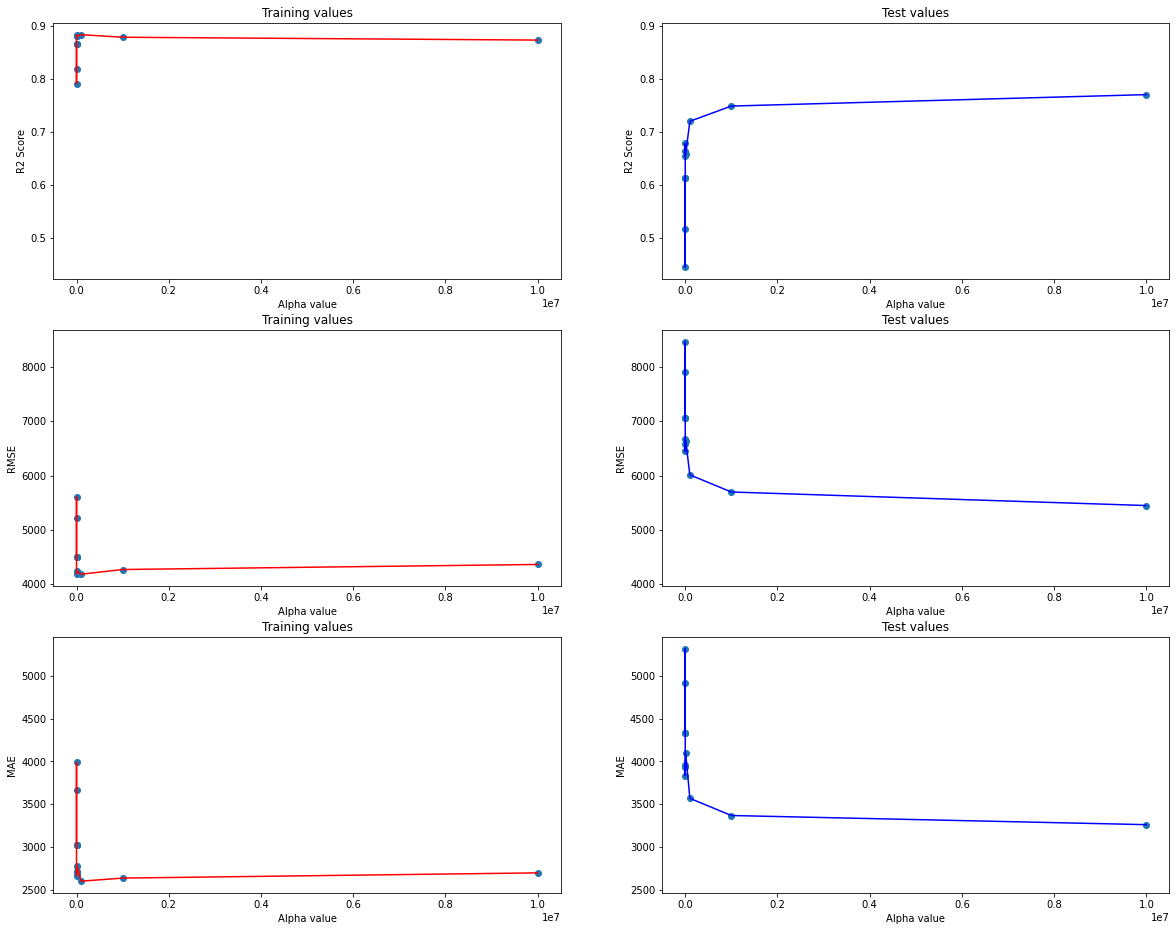

In [174]:
f = plt.figure(figsize=(20,16))

ax1 = f.add_subplot(321)
plt.scatter(alphas, np.array(r2ScoreResult_training))
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.plot(alphas, np.array(r2ScoreResult_training), color = 'red')
plt.title('Training values')

ax2 = f.add_subplot(322, sharey = ax1)
plt.scatter(alphas, r2ScoreResult_test)
plt.xlabel('Alpha value')
plt.ylabel('R2 Score')
plt.plot(alphas, r2ScoreResult_test, color = 'blue')
plt.title('Test values')

ax3 = f.add_subplot(323)
plt.scatter(alphas, np.array(rmseResult_training))
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, np.array(rmseResult_training), color = 'red')
plt.title('Training values')

ax4 = f.add_subplot(324, sharey = ax3)
plt.scatter(alphas, rmseResult_test)
plt.xlabel('Alpha value')
plt.ylabel('RMSE')
plt.plot(alphas, rmseResult_test, color = 'blue')
plt.title('Test values')

ax5 = f.add_subplot(325)
plt.scatter(alphas, np.array(maeResult_training))
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, np.array(maeResult_training), color = 'red')
plt.title('Training values')

ax6 = f.add_subplot(326, sharey = ax5)
plt.scatter(alphas, maeResult_test)
plt.xlabel('Alpha value')
plt.ylabel('MAE')
plt.plot(alphas, maeResult_test, color = 'blue')
plt.title('Test values')

plt.show()

¿Fue posible mejorar el error? ¿Qué hiper-parámetros tiene el modelo que produce el menor error?

Con la regularización Ridge fue posible mejorar el error. El hiper-parámetro que se modificó es el "alpha" que permite cambiar el resultado, haciendolo más o menos preciso.
Por otra parte, el hecho de aplicar una transformación polinomial a los datos hace que su varianza crezca, por lo que se observó que el error cambió significativamente de acuerdo al grado del polinomio. Entre un mayor grado de polinomio, mayor error. Esto nos indicaría que al aumentar la varianza el desempeño del modelo es pero y por tanto empieza a sobre-ajustarse.


¿Qué atributos parecen ser los más importantes para realizar la predicción?

Parece ser que los atributos mas importantes son la edad y el bmi (indicador de masa), de acuerdo al análisis de datos realizado. Lo cual tiene sentido puesto que a mayor edad y pero estado de salud, existe un mayor riesgo de tener un problema de salud.
